# Chem 30324, Spring 2018, Homework 4

# Due February 18, 2019

### In a “1-dimensional hydrogen atom”, an electron is confined to the positive x axis and attracted to a proton at the origin. The potential felt by the electron can be written as

$$V(x) =
  \begin{cases}
    -C\frac{1}{x}  & \quad      \text{if x} > \text{0}\\
    \infty         & \quad      \text{if x} \le \text{0}\\
  \end{cases}$$

### where $c = \frac{e^2}{4\pi\epsilon_0} = \frac{\hbar^2}{m_ea_0}$ is a bunch of constants with units energy times distance. In particular, $m_e$ is the electron mass and $a_0$ is the bohr radius, a convenient unit of length equal to 0.529 Å. It’s easiest to solve the problems below using the second set of constants. Further, the following equations are often of use in solving problems related to this system:

$$\int_0^\infty x^n\mathrm{e}^{-ax}\,\mathrm{d}x = \frac{n!}{a^{n+1}},\quad \frac{d}{dx}x\mathrm{e}^{-ax} = \mathrm{e}^{-ax}(1-ax),\quad \frac{d^2}{dx^2}x\mathrm{e}^{-ax} = a\mathrm{e}^{-ax}(ax-2)$$

### 1. Write down the time-independent Schrödinger equation for the 1-D H atom. Remember to include the domain of the equation.

Time-independent Schrödinger equation: $\hat{H}\cdot\Psi=E\cdot\Psi$

For 1-D H atom: $$\hat{H}=\frac{-\hbar^{2}}{2m}\frac{d^2}{dx^2}-V(x)=\frac{-\hbar^{2}}{2m}\frac{d^2}{dx^2}-C\frac{1}{x},(x>0)$$

$\therefore$ The time-independent Schrödinger equation for the 1-D H atom: $$(\frac{-\hbar^{2}}{2m}\frac{d^2}{dx^2}-C\frac{1}{x})\cdot\Psi = E\cdot \Psi$$

### 2. Would $\phi(x) = e^{ikx}$ be an acceptable wavefunction for this system? Why or why not?

From the Postulates of Non-relativistic Quantum Mechanics (Table 7 in the outline), we can find in Postulate 1 that an acceptable wavefunction requires being square-integrable. 

For a function $f$ to be square-integrable, it means: $$<f,f>=\int_{A}f\cdot\overline{f}dx$$(Be cautious on the conjugate! Normally we judge some real number functions to be square-integrable by $\int_{A}f\cdot fdx$,but it won't work here!)

$$\because \int_{0}^{\infty}\phi(x)\cdot\overline{\phi(x)}dx = \int_{0}^{\infty}e^{ikx}\cdot e^{-ikx}dx = \int_{0}^{\infty}1\cdot dx = \infty$$

$\therefore \phi(x)$ isn't acceptable.

### 3. Consider the candidate wavefunction $\psi_1(x) = \frac{x}{a_0}e^{-x/a_0}$. Plot $V(x)$ and $\psi_1(x)$. Be sure to label axes appropriately. (*Hint*: it is convenient to work in units of $a_0$. That is, make your plots against $x /a_0$ .)

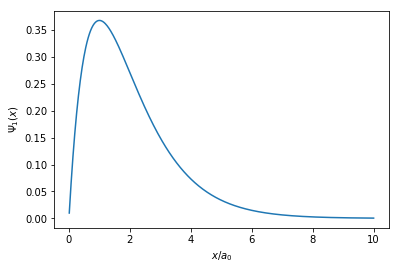

Text(0, 0.5, 'V(x)')

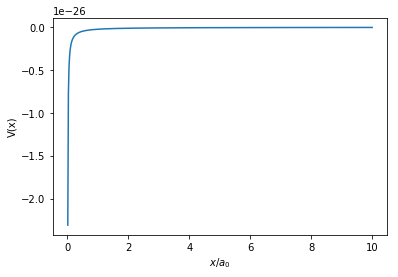

In [29]:
import numpy as np  #Import modules
import matplotlib.pyplot as plt

m = 9.1094*10**-31  # kg
a = 0.529*10**-10  # m
h = 1.05457*10**-34  # J*s


x = np.linspace(0.01,10,500)  # Set up x/a0 list
psy = x*np.exp(-x)  # x serve as the x/a0 in the function
V = -h**2/m/a/x  # x serve as the x/a0 in the function

plt.plot(x,psy)  # plot Psi_1 against x/a0
plt.xlabel("$x/a_0$")
plt.ylabel("$\Psi_1(x)$")
plt.show()
plt.plot(x,V)  # plot V(x) against x/a0
plt.xlabel("$x/a_0$")
plt.ylabel("V(x)")

### 4. Is $\psi_1(x)$ normalized? If not, construct the normalized $\tilde{\psi}_{1}(x)$ . It is ok to express you answer in terms of fundamental constants.

In [28]:
from sympy import *
x = Symbol("x")
a0 = Symbol("a0",positive = true)
Psi1 = integrate((x/a0*exp(-x/a0))**2,(x,0,oo))
print(Psi1)

a0/4


From the postulate 1 (Table 7), we know that for wavefunctions to be nomalized, we need to satisfy: $$\int_{A}\Psi\cdot\Psi dx = 1$$

From the calculation above, we know the nomalization coefficient for $\Psi_1(x)$ is $\frac{1}{\sqrt{\frac{a_0}{4}}} = \frac{2}{\sqrt{a_0}}$

$$\therefore \tilde\Psi_1(x) = \frac{2}{\sqrt{a_0}}\cdot \frac{x}{a_0}e^{-x/a_0}$$

### 5. What is the most probable distance of the electron from the proton, in units of $a_0$?

In [27]:
solve(diff((2/a0**(1/2)*x/a0*exp(-x/a0))**2,x),x)

[0.0, a0]

We can get two results here, including $x=0$ and $x=a_0$. As $x=0$ is meaningless, $x=a_0$ should be the most probable distance of the electron from the proton. 

### 6. What is the probability of finding the electron further than $a_0$ from the proton?

In [135]:
import numpy as np
a0 = 0.529e-10  # m, 0.529Angstrom as given in notes
psi = 2*x/a0**(1.5)*exp(-x/a0) # normailized psi_1
prob = integrate(psi**2,(x,a0,oo))  # integrate psi*psi over all x
print("Probability of finding the electron further than a0 from the proton is %f."%(prob))

Probability of finding the electron further than a0 from the proton is 0.676676.


### 7. If you measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\psi}_{1}(x)$ , will you get the same answer every time? What will you get on average? It is ok to express you answer in terms of fundamental constants.

From lecture notes, linear momentum operator, $\hat{p}_x = -i\hbar\frac{d}{dx}$, where $\hat{p}_x\tilde{\Psi}_{1}(x) = -i\hbar\frac{d}{dx}\frac{2x}{a_0^{3/2}}e^{-x/a_0} = -i\hbar\frac{2}{a_0^{3/2}}(1-\frac{x}{a_0})e^{-x/a_0}$ using chain rule. 

To get the same answer every time, we must have $\hat{p}_x\tilde{\Psi}_{1}(x) =$constant*$\tilde{\Psi}_{1}(x)$, which isn't true in this case. So, $\tilde{\Psi}_{1}(x)$ is not an eigenfunction of $\hat{p}_x$.

Also, using simple integration, we know that the average momentum = 0.

In [172]:
psi = 2*x/a0**1.5*exp(-x/a0)  # same psi as before
ppsi = -i*hbar*2/a0**1.5*(1-x/a0)*exp(-x/a0)  # 'lp' operator operated on psi
pavg = integrate(psi*ppsi,(x,0,oo) )  # integrate psi*p*psi over all x
print("Average momentum = %e. "%(pavg))

Average momentum = 0.000000e+00. 


### 8. If you measure the total energies of many electrons, all with the same wavefunction $\tilde{\psi}_{1}(x)$, will you get the same answer every time? What will you get on average? (*Hint*: It will help to express $V(x)$ in terms of $a_0$ , $\hbar$, and $m_e$ .)

From lecture notes, total energy operator, $\hat{E} = -\frac{\hbar^2}{2m_e}\frac{d^2}{dx^2}+V(x).$ Here, $V(x) = -\frac{\hbar^2}{m_ea_0x}$.

$$\hat{E}\tilde{\Psi}_{1}(x) = -\frac{\hbar^2}{2m_e}\frac{d^2}{dx^2}\tilde{\Psi}_{1}(x)-\frac{\hbar^2}{m_ea_0x}\tilde{\Psi}_{1}(x) = -\frac{\hbar^2}{2m_ea_0^2}\frac{2x}{a_0^{3/2}}e^{-x/a_0}$$

Recall $$\tilde{\Psi}_{1}(x) = \frac{2x}{a_0^{3/2}}e^{-x/a_0}$$ So, $$ \hat{E}\tilde{\Psi}_{1}(x) = -\frac{\hbar^2}{2m_ea_0^2}\tilde{\Psi}_{1}(x)=constant*\tilde{\Psi}_{1}(x)$$

$\tilde{\Psi}_{1}(x)$ is the eigenfunction of $\hat{E}$ since we can get the same expected value every time (i.e. $-\frac{\hbar^2}{2m_ea_0^2}$), which is the eigenvalue of operator $\hat{E}$.

### 9. The normalized wavefunction $\tilde{\psi}_{2}(x) = \frac{x}{\sqrt{2}a_0^{3/2}}(1-\frac{x}{2a_0})e^{-x/2a_0}$ is an eigenfunction of the one-dimensional H atom Schrödinger equation with eigenvalue $E_{2} = - \frac{\hbar^2}{8m_ea_0^2}$ . Plot $\tilde{\psi}_{2}(x)$ . Are $\tilde{\psi}_{1}(x)$ and $\tilde{\psi}_{2}(x)$ orthogonal? (Be sure to justify your answer!)

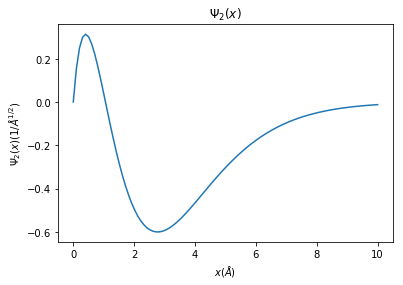

In [196]:
import numpy as np
import matplotlib.pyplot as plt

a0 = 0.529 #angstrom (we're plotting in angstrom)
x = np.linspace(0,10,100)  # find a meaningful range
psi2 = x/2**0.5/a0**1.5*(1-x/2/a0)*np.exp(-x/2/a0) # normalized psi2
plt.plot(x,psi2) # plot the oringinal wavefunction
plt.xlabel('$x(\AA)$') #xlabel
plt.ylabel('$\Psi_2(x)(1/\AA^{1/2})$') #ylabel
plt.title('$\Psi_2(x)$') #title
plt.show() #required to show plot

In [185]:
x = symbols('x') # avoid python errors
psi = 2*x/a0**1.5*exp(-x/a0) # rewrite normalized psi1
psi2 = x/2**0.5/a0**1.5*(1-x/2/a0)*exp(-x/2/a0) # rewrite normalized psi2
psipsi2 = integrate(Psi_1*Psi_2,(x,0,oo)) # integrate psi1*psi2
print("Since integral of psi1*psi2 = %f, hence they are orthogonal to each other."%(psipsi2))

Since integral of psi1*psi2 = 0.000000, hence they are orthogonal to each other.


### 10. The uncertainties in the positions of an electron described by $\tilde{\psi}_{1}(x)$ and $\tilde{\psi}_{2}(x)$ can be shown to be $2^{1/2} a_{0}$ and $6^{1/2} a_{0}$, respectively. Contrast the uncertainties in their linear speeds.

From the uncertainty principle $\Delta p\Delta x\geq\frac{\hbar}{2}$, $$m\Delta v\Delta x\geq\frac{\hbar}{2}, \Delta v\geq\frac{\hbar}{2m\Delta x}$$

In [204]:
# get values from lecture notes
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg
a0 = 0.529e-10 # m
# let uncertainty = dx1, dx2, dv1, dv2
dx1 = 2**0.5*a0 # m
dx2 = 6**0.5*a0 # m
dv1 = hbar/(2*me*dx1) # m/s
dv2 = hbar/(2*me*dx2) # m/s
print("We found that dv1 = %f, dv2 = %f m/s."%(dv1, dv2))
print("We found that dv1 > dv2.")

We found that dv1 = 773756.027075, dv2 = 446728.250519 m/s.
We found that dv1 > dv2


$\Delta x_1 <\Delta x_2$, according to the uncertainty principle, we get $\Delta v_1 >\Delta v_2$.

### EXTRA CREDIT. Suppose an electron is in a superposition state described by $\xi(x) = \frac{1}{\sqrt{3}}(\tilde{\psi}_{1}(x) + \sqrt{2}\tilde{\psi}_{2}(x))$. If  you measure the total energies of many electrons, all with the same wavefunction $\xi(x)$, will you get the same answer every time? What will you get on average? It is ok to express you answer in terms of fundamental constants.

Here, we'll use $\hat{H}$ as our total energy operator instead of $\hat{E}$. 
$$\hat{H}\xi(x) = \frac{1}{\sqrt{3}}[{\hat{H}\tilde{\Psi}_{1}(x)+\sqrt{2}\hat{H}\tilde{\Psi}_{2}(x)}]= \frac{1}{\sqrt{3}}[E_1\tilde{\Psi}_{1}(x)+\sqrt{2}E_2\tilde{\Psi}_{2}(x)]$$ 
From problems 8 & 9, we know the values for $E_1, E_2$.
$$\hat{H}\xi(x) = \frac{-1}{\sqrt{3}}[(\frac{\hbar^2}{2m_ea_0^2})\tilde{\Psi}_{1}(x)+(\frac{\sqrt{2}\hbar^2}{8m_ea_0^2})\tilde{\Psi}_{2}(x)]\neq constant(\tilde{\Psi}_{1}(x)+\sqrt{2}\tilde{\Psi}_{2}(x))$$ 

$\hat{H}\xi(x)$ does not give us $constant*\xi(x)$. Hence, $\xi(x)$ is not the eigenfunction of $\hat{H}$ (i.e. we don't get the same answer every time)

Use Dirac notation to find the average of total energies:
$$\langle H\rangle = \langle \xi(x)\lvert\hat{H}\rvert\xi(x)\rangle = \langle \frac{1}{\sqrt{3}}\tilde{\Psi}_{1}(x) +  \frac{\sqrt{2}}{\sqrt{3}}\tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\frac{1}{\sqrt{3}}\tilde{\Psi}_{1}(x) +  \frac{\sqrt{2}}{\sqrt{3}}\tilde{\Psi}_{2}(x)\rangle$$
$$= \frac{1}{3}\langle \tilde{\Psi}_{1}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{1}(x)\rangle+ \frac{\sqrt{2}}{3}\langle \tilde{\Psi}_{1}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{2}(x)\rangle + \frac{\sqrt{2}}{3}\langle \tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{1}(x)\rangle+\frac{2}{3}\langle \tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{2}(x)\rangle$$
We ignore orthogonal sets where i $\neq$ j
$$\langle H\rangle = \frac{1}{3}\langle \tilde{\Psi}_{1}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{1}(x)\rangle+\frac{2}{3}\langle \tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{2}(x)\rangle = \frac{1}{3}E_1+\frac{2}{3}E_2$$
Therefore, the average total energy will be:
$$\langle H\rangle = \frac{1}{3}(\frac{-\hbar^2}{2m_ea_0^2})+\frac{2}{3}(\frac{-\hbar^2}{8m_ea_0^2}) = -\frac{\hbar^2}{4m_ea_0^2}$$

Therefore, in experiments, there is 1/3 chance we'll measure $E_1$ originated from $\tilde{\Psi}_{1}(x)$ and 2/3 chance we'll measure $E_2$ originated from $\tilde{\Psi}_{2}(x)$.